In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Venda em Varejo
<img src="https://files.nsctotal.com.br/s3fs-public/graphql-upload-files/P%C3%A1gina_TOP_Divulga%C3%A7%C3%A3o_Varejo.jpg?0E4nLroL8Td0Wcf.KRLiMVYmBcAEYUPI" width="400" height="100"/>



|         Dicionário        |                                                                                            |
|:-------------------------:|:------------------------------------------------------------------------------------------:|
|      Item_Identifier      |                                      ID único de produto                  |
| Item_Weight               | Peso do Produto                                                                         |
| Item_Fat_Content:         | Se o produto tem baixo teor de gordura ou não                                                     |
| Item_Visibility           | The % of total display area of all products in a store allocated to the particular product |
| Item_Type                 | A categoria à qual o produto pertence                                                  |
| Item_MRP                  | Preço máximo de varejo (preço de lista) do produto                                         |
| Outlet_Identifier         | ID de loja única                                                                           |
| Outlet_Establishment_Year | O ano em que a loja foi criada                                                    |
| Outlet_Size               | O tamanho da loja em termos de área coberta                                      |
| Outlet_Location_Type      | O tipo de cidade em que a loja está localizada                                             |
| Outlet_Type               | Seja o ponto de venda apenas uma mercearia ou algum tipo de supermercado                     |
| Item_Outlet_Sales         | Vendas do produto na loja específica. Esta é a variável de resultado a ser prevista |

In [213]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Big-Mart-Sales-Prediction/master/train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Ver se tem valores fora do padrão

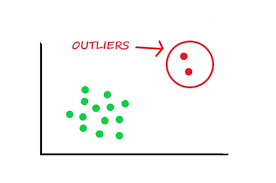

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [214]:
x = df.drop(columns=['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

In [215]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

# Retirar colunas que não usaremos no nosso modelo

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

In [216]:
train_x = train_x.drop(columns=['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'], axis=1)
test_x = test_x.drop(columns=['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'], axis=1)

# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [217]:
pd.isna(df).sum().to_frame("Valor Vazio")

,Valor Vazio
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [218]:
train_x['Item_Weight'].fillna(train_x['Item_Weight'].mean(), inplace = True)
train_x['Outlet_Size'].fillna(train_x['Outlet_Size'].mode()[0], inplace = True)

test_x['Item_Weight'].fillna(train_x['Item_Weight'].mean(), inplace = True)
test_x['Outlet_Size'].fillna(train_x['Outlet_Size'].mode()[0], inplace = True)

# Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://miro.medium.com/max/2134/1*C5XM-0LZSMBd1EEiYZbYxA.png" width="350" height="100"/>

In [219]:
scaler = StandardScaler().fit(train_x[['Item_Weight', 'Item_Visibility','Item_MRP']])

train_x[['Item_Weight', 'Item_Visibility','Item_MRP']] = scaler.transform(train_x[['Item_Weight', 'Item_Visibility','Item_MRP']])
test_x[['Item_Weight', 'Item_Visibility','Item_MRP']] = scaler.transform(test_x[['Item_Weight', 'Item_Visibility','Item_MRP']])

# Categóricas em numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="600" height="100"/>

In [220]:
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)

train_x, test_x = train_x.align(test_x, join='inner', axis=1)

In [221]:
train_x

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,-0.801383,-0.600703,0.470709,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
7757,1.210152,-0.362159,0.457877,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
764,1.115491,0.194933,-0.482625,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6867,-1.079448,-0.704944,-1.603553,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2716,-0.008602,1.383177,0.218375,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.826231,4.282848,-0.043511,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5191,0.642189,1.001006,-1.059078,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5390,1.115491,-0.916931,1.526207,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
860,1.766282,-0.228187,-0.383072,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


## Treinar o modelo com os principais algorítimos supervisionados de Regressão

<img src="https://i.ibb.co/87M89qH/LR-LDA-DT-KNN-SVM-RF-1.png" width="200" height="80"/>

In [222]:
LR = LinearRegression().fit(train_x,train_y)
GLMNET = ElasticNet().fit(train_x,train_y)
CART = DecisionTreeRegressor().fit(train_x,train_y)
SVM = SVR().fit(train_x,train_y)
KNN = KNeighborsRegressor().fit(train_x,train_y)

In [223]:
predict_train_LR = LR.predict(train_x)
predict_test_LR = LR.predict(test_x)

predict_train_GLMNET = GLMNET.predict(train_x)
predict_test_GLMNET = GLMNET.predict(test_x)

predict_train_CART = CART.predict(train_x)
predict_test_CART = CART.predict(test_x)

predict_train_SVM = SVM.predict(train_x)
predict_test_SVM = SVM.predict(test_x)

predict_train_KNN = KNN.predict(train_x)
predict_test_KNN = KNN.predict(test_x)

In [224]:
test_y = pd.DataFrame(test_y)
test_y['predito_LR'] = predict_test_LR
test_y['predito_GLMNET'] = predict_test_GLMNET
test_y['predito_CART'] = predict_test_CART
test_y['predito_SVR'] = predict_test_SVM
test_y['predito_KNN'] = predict_test_KNN

In [225]:
test_y

,Item_Outlet_Sales,predito_LR,predito_GLMNET,predito_CART,predito_SVR,predito_KNN
7503,1743.0644,1364.0,1720.413890,554.6114,1655.488375,1307.89752
2957,356.8688,778.0,1040.723617,669.1290,1529.086225,1218.28084
7031,377.5086,808.0,1254.026372,690.4346,1536.599433,1507.23804
1084,5778.4782,4231.0,2879.670786,4763.7990,1994.801958,5344.64292
856,2356.9320,3284.0,2922.427413,3372.9428,1994.411966,4004.52068
...,...,...,...,...,...,...
7205,3004.0896,2109.0,1901.577998,1139.8496,1735.769712,2147.07184
3257,890.8404,2166.0,2416.360044,1057.9562,1842.368725,1898.99476
6346,629.1810,854.0,1333.367801,701.7532,1573.724161,1224.27304
6318,253.0040,574.0,1067.307530,615.1992,1577.012487,948.09920


## Métricas de Modelo Supervisonado de Regressão


Aqui há três métricas comuns para problema de regressão:

**Mean Absolute Error** (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando essas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular do que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque RMSE pode ser interpretado nas unidades "y".

In [226]:
mae_test_LR = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_LR'])
mae_test_GLMNET = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_GLMNET'])
mae_test_CART = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_CART'])
mae_test_SVR = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_SVR'])
mae_test_KNN = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_KNN'])

mse_test_LR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_LR'])
mse_test_GLMNET = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_GLMNET'])
mse_test_CART = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_CART'])
mse_test_SVR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_SVR'])
mse_test_KNN = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_KNN'])

rmse_test_LR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_LR'])**(0.5)
rmse_test_GLMNET = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_GLMNET'])**(0.5)
rmse_test_CART = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_CART'])**(0.5)
rmse_test_SVR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_SVR'])**(0.5)
rmse_test_KNN = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_KNN'])**(0.5)

In [227]:
metricas = {
        'MAE':  [mae_test_LR,
                 mae_test_GLMNET,
                 mae_test_CART,
                 mae_test_SVR,
                 mae_test_KNN
                      ],
        'MSE': [mse_test_LR,
                mse_test_GLMNET,
                mse_test_CART,
                mse_test_SVR,
                mse_test_KNN
                      ],
        'RMSE' :   [rmse_test_LR,
                    rmse_test_GLMNET,
                    rmse_test_CART,
                    rmse_test_SVR,
                    rmse_test_KNN
                      ]
        }

dados = pd.DataFrame(metricas, columns = ['MAE', 'MSE','RMSE'], index=['LR','GLMNET','CART','SVR','KNN'])

dados

,MAE,MSE,RMSE
LR,793.281032,1.148046e+06,1071.469255
GLMNET,977.067595,1.645810e+06,1282.891222
CART,1043.185983,2.266563e+06,1505.510905
SVR,1178.961155,2.475674e+06,1573.427351
KNN,825.749137,1.377655e+06,1173.735618
